In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train=pd.read_csv('../data/train.csv', index_col='ID_code')
test=pd.read_csv('../data/test.csv', index_col='ID_code')
submission=pd.read_csv('../data/sample_submission.csv')

In [3]:
print(train.shape)
train.head()

(200000, 201)


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
print(test.shape)
test.head()

(200000, 200)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
x = train.loc[:,train.columns !='target']
print(x.shape)
x.head()

(200000, 200)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
y = train['target']
print(y.shape)
y.head()

(200000,)


ID_code
train_0    0
train_1    0
train_2    0
train_3    0
train_4    0
Name: target, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x = scaler.transform(x)

In [11]:
x.mean(), x.std()

(-1.1152668122349497e-15, 1.0000000000000013)

In [12]:
y = np.array(y)

In [13]:
y = y.reshape(y.shape[0],1)

In [14]:
print(y.shape)
y

(200000, 1)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.3, random_state=42, shuffle=True)

In [17]:
x_train.shape, x_valid.shape,y_train.shape, y_valid.shape

((140000, 200), (60000, 200), (140000, 1), (60000, 1))

In [18]:
x_train=torch.FloatTensor(x_train)
x_valid=torch.FloatTensor(x_valid)
y_train=torch.FloatTensor(y_train)
y_valid=torch.FloatTensor(y_valid)

In [19]:
x_train.size(), x_valid.size(),y_train.size(), y_valid.size()

(torch.Size([140000, 200]),
 torch.Size([60000, 200]),
 torch.Size([140000, 1]),
 torch.Size([60000, 1]))

In [20]:
train = data_utils.TensorDataset(x_train, y_train)
valid = data_utils.TensorDataset(x_valid, y_valid)

In [21]:
trainloader = torch.utils.data.DataLoader(train, batch_size=20000, shuffle=True)
validloader = torch.utils.data.DataLoader(valid, batch_size=20000, shuffle=True)

In [22]:
train, label =next(iter(trainloader))

In [23]:
train.size(), label.size()

(torch.Size([20000, 200]), torch.Size([20000, 1]))

In [24]:
valid, label =next(iter(validloader))

In [25]:
valid.size(), label.size()

(torch.Size([20000, 200]), torch.Size([20000, 1]))

In [26]:
fc1 = nn.Linear(200, 150)
ac1 = nn.ReLU()
dr1 = nn.Dropout(p=0.2)
fc2 = nn.Linear(150, 100)
ac2 = nn.ReLU()
dr2 = nn.Dropout(p=0.2)
fc3 = nn.Linear(100, 50)
ac3 = nn.ReLU()
dr3 = nn.Dropout(p=0.2)
fc4 = nn.Linear(50, 1)
ac4 = nn.Sigmoid()
        
model = nn.Sequential(fc1,ac1,dr1,fc2,ac2,dr2,fc3,ac3,dr3,fc4,ac4)

model

Sequential(
  (0): Linear(in_features=200, out_features=150, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=150, out_features=100, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2)
  (9): Linear(in_features=50, out_features=1, bias=True)
  (10): Sigmoid()
)

In [27]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 200

training_loss =[]
validation_loss =[]

for e in range(epochs):
   
    running_losses = 0
    for trains, labels in trainloader:
        
        optimizer.zero_grad()
        
        output = model(trains)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_losses += loss.item()
        
    else:
        test_losses = 0 
        
        with torch.no_grad():
            model.eval()
            for valids, labels in validloader:
                
                ps = model(valids)
                test_losses += criterion(ps, labels)
        
        training_loss.append(running_losses)
        validation_loss.append(test_losses)
    
    
        if validation_loss[e-1] > validation_loss[e]:
            torch.save(model, '../model/nn_model' + '{e}' +'pth')
        

        model.train()
        
        if e % 10 == 0:
            print(f"epoch: {e}/{epochs}", 
                 f"training_loss: {training_loss[e]: .3f}",
                 f"validation_loss: {validation_loss[e]: .3f}") 

epoch: 0/200 training_loss:  4.330 validation_loss:  1.151
epoch: 10/200 training_loss:  1.670 validation_loss:  0.752
epoch: 20/200 training_loss:  1.600 validation_loss:  0.752
epoch: 30/200 training_loss:  1.508 validation_loss:  0.768
epoch: 40/200 training_loss:  1.394 validation_loss:  0.798
epoch: 50/200 training_loss:  1.321 validation_loss:  0.831
epoch: 60/200 training_loss:  1.249 validation_loss:  0.877
epoch: 70/200 training_loss:  1.195 validation_loss:  0.911
epoch: 80/200 training_loss:  1.133 validation_loss:  0.948
epoch: 90/200 training_loss:  1.099 validation_loss:  0.974
epoch: 100/200 training_loss:  1.055 validation_loss:  1.015
epoch: 110/200 training_loss:  1.017 validation_loss:  1.053
epoch: 120/200 training_loss:  0.996 validation_loss:  1.064
epoch: 130/200 training_loss:  0.964 validation_loss:  1.096
epoch: 140/200 training_loss:  0.934 validation_loss:  1.118
epoch: 150/200 training_loss:  0.905 validation_loss:  1.138
epoch: 160/200 training_loss:  0.88

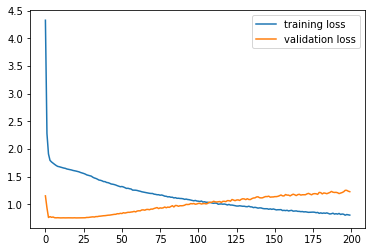

In [28]:
plt.plot(training_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend()

## Inference

Now that the model is trained, we can use it for inference. We've done this before, but now we need to remember to set the model in inference mode with `model.eval()`. You'll also want to turn off autograd with the `torch.no_grad()` context.

In [29]:
test = np.array(test)

In [30]:
test=scaler.fit_transform(test)

In [31]:
test.mean(), test.std()

(6.021986465043483e-16, 0.9999999999999997)

In [32]:
model.eval()


with torch.no_grad():
    output = model(test)

AttributeError: 'numpy.ndarray' object has no attribute 'dim'